<a href="https://colab.research.google.com/github/ankanasamanta12/Kaggle-Competition---Kobe-Bryant-Shot-Analysis/blob/main/Kobe_Bryant_Shot_Analysis(_Kaggle_Assignment).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Science Engineering Methods and Tools**
### **Assignment 2 : Kaggle**

**Name - Ankana Asit Baran Samanta**

**NUID - 001007431**

# **Abstract**

The purpose of the notebook is predict which shots made by Kobe Bryant will make it to the Basket.For each missing shot_made_flag(target) in the data set,we need to predict a probability that Kobe made the field goal.Basket Ball shots depends on various factors depending on distance and timing from basket.The Following steps are going to be executed in order to predict the  model

1. Data Checking 
2. Exploratory Data Analysis
2. Feature Selection and Engineering
3. Build Multiple Optimized Models
4. Hyperparameter Tuning
5. Model Selection
6. SHAP values Interpretation


In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 73 bytes


In [ ]:
!kaggle competitions download -c "kobe-bryant-shot-selection"

  0% 0.00/12.4k [00:00<?, ?B/s]
100% 12.4k/12.4k [00:00<00:00, 21.7MB/s]
  0% 0.00/679k [00:00<?, ?B/s]
100% 679k/679k [00:00<00:00, 37.4MB/s]


In [ ]:
! unzip data.csv.zip -d data

Archive:  data.csv.zip
  inflating: data/data.csv           


## **Import the necessary Libraries and Loading Data**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math as m
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier, RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.feature_selection import VarianceThreshold, RFE, SelectKBest, chi2
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import lightgbm as lgb
# Any results you write reaad_csv('..ent direc
df = pd.read_csv('data/data.csv')

df.head()


,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,0,2000-01,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,0,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


## **Descriptive Statistics**

In [ ]:
df.shape

(30697, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

In [ ]:
df.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,30697.000000,3.069700e+04,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,25697.000000,3.069700e+04,30697.000000
mean,249.190800,2.476407e+07,33.953192,7.110499,91.107535,-118.262690,4.885624,2.519432,0.146562,28.365085,13.437437,0.446161,1.610613e+09,15349.000000
std,150.003712,7.755175e+06,0.087791,110.124578,87.791361,0.110125,3.449897,1.153665,0.353674,17.478949,9.374189,0.497103,0.000000e+00,8861.604943
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.000000
25%,110.000000,2.050008e+07,33.884300,-68.000000,4.000000,-118.337800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7675.000000
50%,253.000000,2.090035e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15349.000000
75%,368.000000,2.960047e+07,34.040300,95.000000,160.000000,-118.174800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,23023.000000
max,659.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


## **Exploratory Data Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


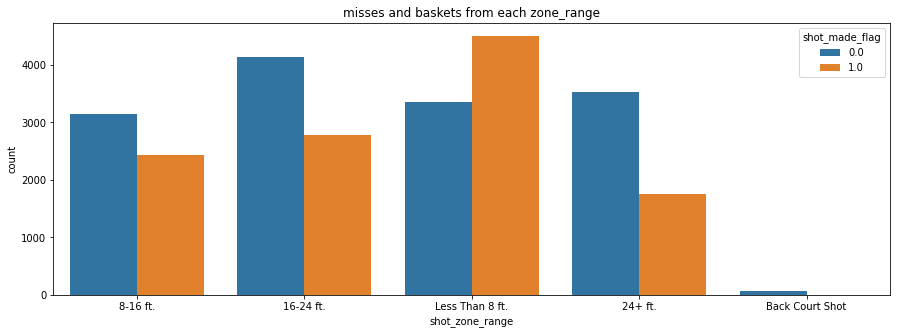

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.countplot('shot_zone_range',hue='shot_made_flag',data=df[df.shot_made_flag.notnull()])
plt.title('misses and baskets from each zone_range')
plt.show()

The above bar plot is to show the number of shots which were missed or made it to the basket depending on feature Shot_zone_range which is the range of distance from the basket.

The feature shot_made_flag indicates it is 0 when the shot is missed and 1 when the shot is made.

As seen in the graph above the Less than 8ft shot zone range has the most number of successful shots

In [ ]:
df.corr()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
game_event_id,1.000000,-0.002553,-0.060091,-0.028404,0.060091,-0.028404,-0.270736,0.956042,-0.004507,-0.021293,0.062077,-0.037232,NaN,0.028478
game_id,-0.002553,1.000000,0.013021,-0.019553,-0.013021,-0.019553,0.014481,0.009879,0.917235,-0.007107,-0.030327,-0.001612,NaN,0.761656
lat,-0.060091,0.013021,1.000000,0.016217,-1.000000,0.016217,0.071462,-0.041248,-0.001143,0.052714,-0.818517,0.148070,NaN,-0.030790
loc_x,-0.028404,-0.019553,0.016217,1.000000,-0.016217,1.000000,0.006898,-0.028165,-0.012790,0.001083,0.022654,-0.000848,NaN,-0.019917
loc_y,0.060091,-0.013021,-1.000000,-0.016217,1.000000,-0.016217,-0.071462,0.041248,0.001143,-0.052714,0.818517,-0.148070,NaN,0.030790
lon,-0.028404,-0.019553,0.016217,1.000000,-0.016217,1.000000,0.006898,-0.028165,-0.012790,0.001083,0.022654,-0.000848,NaN,-0.019917
minutes_remaining,-0.270736,0.014481,0.071462,0.006898,-0.071462,0.006898,1.000000,-0.043425,0.015101,0.025558,-0.059767,0.028342,NaN,-0.005731
period,0.956042,0.009879,-0.041248,-0.028165,0.041248,-0.028165,-0.043425,1.000000,0.008789,0.005832,0.046993,-0.032152,NaN,0.000364
playoffs,-0.004507,0.917235,-0.001143,-0.012790,0.001143,-0.012790,0.015101,0.008789,1.000000,-0.002490,-0.008667,-0.001257,NaN,0.612571
seconds_remaining,-0.021293,-0.007107,0.052714,0.001083,-0.052714,0.001083,0.025558,0.005832,-0.002490,1.000000,-0.051482,0.030804,NaN,-0.004868


### **Plotting the distribution of various features**

In [ ]:
def color_generator(num_colors):
    colors = []
    for i in range(num_colors):
        colors.append((np.random.rand(), np.random.rand(), np.random.rand()))
    return colors

The above code defines a function to generate random colors to be plotted on the graph.

In [ ]:
colors = color_generator(100)

In [ ]:
#for plotting zone_wise points and checking their mean of target variable
def plot_zone_wise(zone_name):
    c_mean = df.groupby(zone_name)['shot_made_flag'].mean()
    plt.figure(figsize=(15,15))
    for i, area in enumerate(df[zone_name].unique()):
        plt.subplot(121)
        c = df.loc[(df[zone_name]==area)]
        plt.scatter(c.loc_x, c.loc_y,alpha=0.5 ,c=colors[i])
        plt.text(c.loc_x.mean(), c.loc_y.quantile(0.80), '%0.3f'%(c_mean[area]),size=15, bbox=dict(facecolor='red', alpha=0.5))
        plt.ylim(-100, 900)
    plt.legend(df[zone_name].unique())
    plt.title(zone_name)
    plt.show()

The above code is creating a function plot_zone_wise to plot the distribution of number of shots that were taken from a certain zone of the court. Furthermore the mean is calculated for the total number of shots that were taken from that zone. It takes the features loc_x and Loc_y to get the exact position in the court.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB

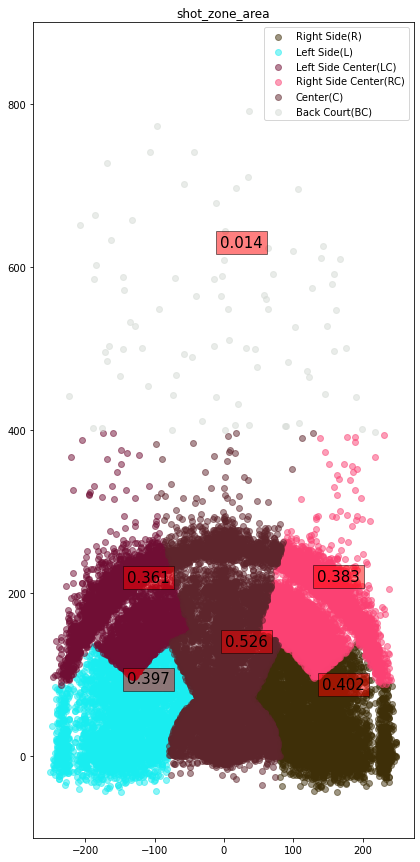

In [ ]:
plot_zone_wise('shot_zone_area')

The above code is calling the plot_zone_wise function and uses the feature shot_zone_range to show the distribution of shots taken from.  

*   Each shot_zone_area value is representated by the random color functions which is defined the previous function
*   We can observe that most of shots were taken from the Center zone which is represented by the maximum mean value




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


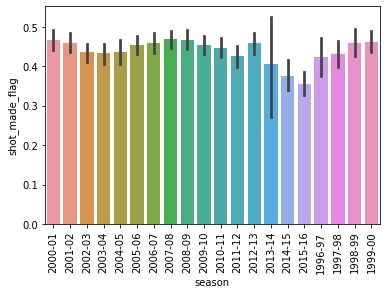

In [ ]:
import seaborn as sns
sns.barplot('season', 'shot_made_flag', data=df)
plt.xticks(rotation='vertical')
plt.show()

The above code is to show which season had how many shots were attempted in a particular season.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB

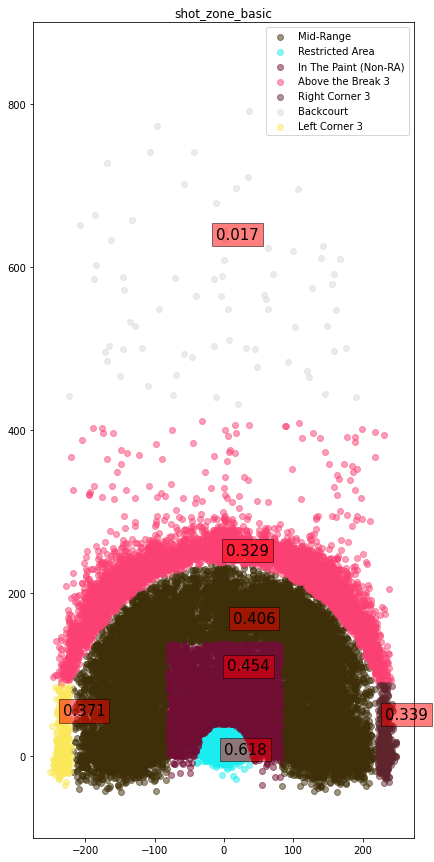

In [ ]:
plot_zone_wise('shot_zone_basic')

The above code is calling the function plot_zone_wise for the feature shot_zone_basic. As observed that the farther we move away form the basket the probability of shots made is descreasing

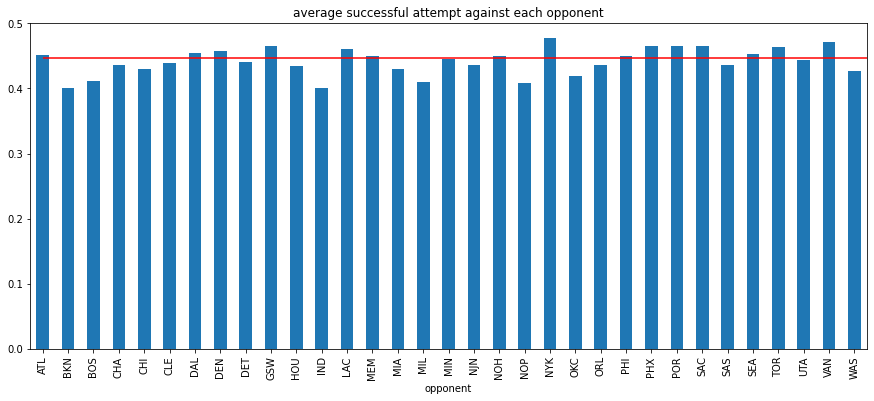

In [ ]:
average_successful_attempt=df.shot_made_flag.mean()
plt.figure(figsize=(15,6))
df.groupby('opponent')['shot_made_flag'].mean().plot(kind='bar')
plt.hlines(average_successful_attempt, 0,33, colors='red')
plt.title('average successful attempt against each opponent')
plt.show()

The above bar plot shows how many average shots that were successful in front of which opponent team.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


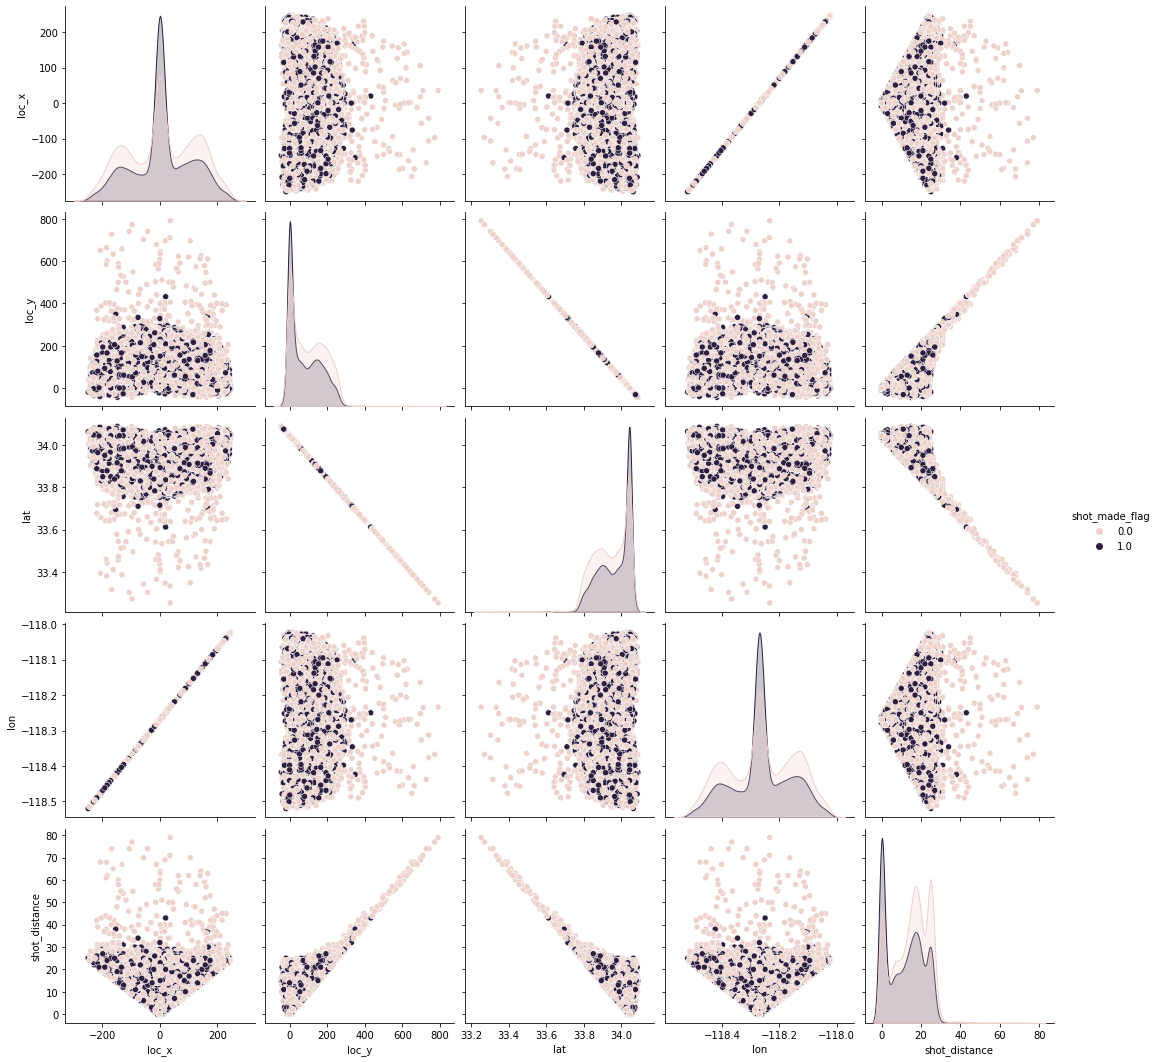

In [ ]:
sns.pairplot(df, vars=['loc_x', 'loc_y', 'lat', 'lon', 'shot_distance'], hue='shot_made_flag', size=3)
plt.show()

The above pairplot visualizes the relation between the features lat,long,loc_x,loc_y and shot_distance.


*   It is observed that the lat and long are strong correlated to loc_x and loc_y
*   The dark color represent shot_made_flag=1 and the light color is shot_made_flag =0



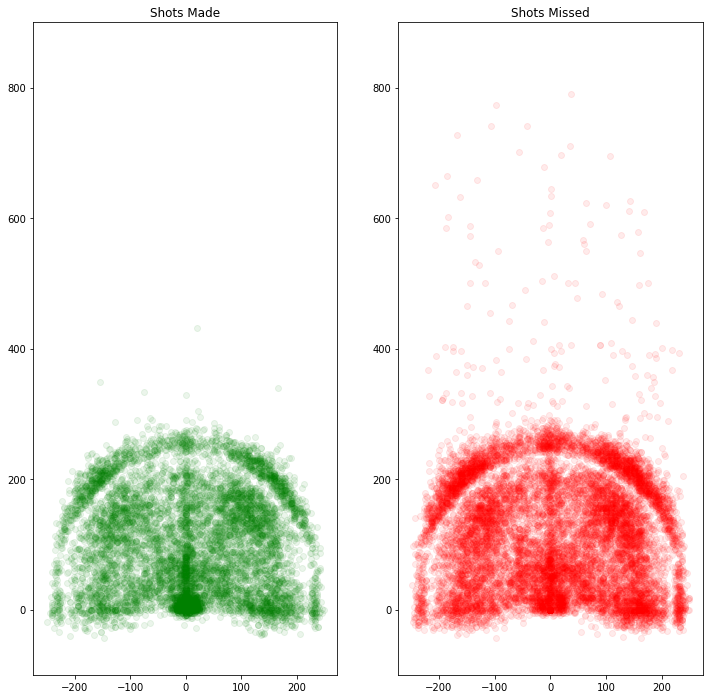

In [ ]:
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.scatter(df.loc[df.shot_made_flag==1, 'loc_x'], df.loc[df.shot_made_flag==1, 'loc_y'], alpha=0.08, c='g')
plt.title('Shots Made')
plt.ylim(-100, 900)
plt.subplot(122)
plt.scatter(df.loc[df.shot_made_flag==0, 'loc_x'], df.loc[df.shot_made_flag==0, 'loc_y'], alpha=0.08, c='r')
plt.title('Shots Missed')
plt.ylim(-100, 900)
plt.show()

The above scatterplot shows the number of the shots made and missed at particular loc_x and loc_y.

# **Data Preprocessing**

In [ ]:
df.isnull().sum()

action_type              0
combined_shot_type       0
game_event_id            0
game_id                  0
lat                      0
loc_x                    0
loc_y                    0
lon                      0
minutes_remaining        0
period                   0
playoffs                 0
season                   0
seconds_remaining        0
shot_distance            0
shot_made_flag        5000
shot_type                0
shot_zone_area           0
shot_zone_basic          0
shot_zone_range          0
team_id                  0
team_name                0
game_date                0
matchup                  0
opponent                 0
shot_id                  0
dtype: int64

As seen from the above check for missing values the column shot_made_flag has 5000 missing rows. These are the rows for which the probability needs to be calculated in Test whether the shot will make it to the basket or not.These are the missing test set shots which we need to make a submission for if the shot is made or not.

In [ ]:
shot_id_rows = pd.DataFrame({'shot_id' : df[df['shot_made_flag'].isnull()].reset_index()['shot_id']})

The shot_id_rows variable is storing the default index of the shot_id of the missing shot_made_flag rows for which the probability needs to be calculated. This will be later used for test set.



In [ ]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,0,2000-01,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,0,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


### **Feature Engineering**

Here we will make the features easy to read and introduce new columns to the dataframe for better processing.
The Categorical columns will be handled using One Hot encoding.

In [ ]:
df.action_type.value_counts()

Jump Shot                             18880
Layup Shot                             2567
Driving Layup Shot                     1978
Turnaround Jump Shot                   1057
Fadeaway Jump Shot                     1048
Running Jump Shot                       926
Pullup Jump shot                        476
Turnaround Fadeaway shot                439
Slam Dunk Shot                          411
Reverse Layup Shot                      395
Jump Bank Shot                          333
Driving Dunk Shot                       310
Dunk Shot                               262
Tip Shot                                182
Alley Oop Dunk Shot                     122
Step Back Jump shot                     118
Floating Jump shot                      114
Driving Reverse Layup Shot               97
Hook Shot                                84
Driving Finger Roll Shot                 82
Alley Oop Layup shot                     80
Reverse Dunk Shot                        75
Running Layup Shot              

In [ ]:
df['action_type'] = df.action_type.apply(lambda x: x.replace('-', ''))
df['action_type'] = df.action_type.apply(lambda x: x.replace('Follow Up', 'FollowUp'))
df['action_type'] = df.action_type.apply(lambda x: x.replace('Finger Roll','FingerRoll'))
df['action_type'] = df.action_type.apply(lambda x: x.replace('Alley Oop','AlleyOop'))
df['action_type'] = df.action_type.apply(lambda x: x.replace('Step Back','StepBack'))

Here in the above code the values of the feature action_type is modified in order to make it easier for the model to read it.


*   The hyphen is removed from certain words
*   Some words that contain a space have been combines to 1 word like Follow Up is now Followup



In [ ]:
df.loc[df['action_type']== 'Running Slam Dunk Shot', 'action_type'] = 'Slam Dunk Shot'
df.loc[df['action_type']== 'Driving Floating Bank Jump Shot', 'action_type'] = 'Jump Bank Shot'

The above code preprocess the big words with a smaller chunk so it is easy for the model to read some values. 

In [ ]:
cv = CountVectorizer(max_features=50, stop_words=['shot'])
shot_features = cv.fit_transform(df['action_type']).toarray()
shot_features = pd.DataFrame(shot_features, columns=cv.get_feature_names())
print(shot_features)

       alleyoop  bank  cutting  driving  ...  slam  stepback  tip  turnaround
0             0     0        0        0  ...     0         0    0           0
1             0     0        0        0  ...     0         0    0           0
2             0     0        0        0  ...     0         0    0           0
3             0     0        0        0  ...     0         0    0           0
4             0     0        0        1  ...     0         0    0           0
...         ...   ...      ...      ...  ...   ...       ...  ...         ...
30692         0     0        0        0  ...     0         0    0           0
30693         0     0        0        0  ...     0         0    1           0
30694         0     0        0        0  ...     0         0    0           0
30695         0     0        0        0  ...     0         0    0           0
30696         0     0        0        0  ...     0         0    0           0

[30697 rows x 20 columns]


The above code uses CountVectorizer. This function is used to extract text from data and store them in the form of vectors. This process is called Tokenization. 


*   In this dataset for action_type, there are multiple verbs being used for every shot like Running Finger Roll Layup Shot
*   Each of these verbs can be separated into vector to know how many times they appear
*   If each of them are counted individually it will be a success for the model as to which verbs are coming for effectively in the shots



In [ ]:
df = pd.concat([df,shot_features], axis="columns")

In [ ]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id,alleyoop,bank,cutting,driving,dunk,fadeaway,fingerroll,floating,followup,hook,jump,layup,pullup,putback,reverse,running,slam,stepback,tip,turnaround
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,0,2000-01,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,0,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Combining minutes_remaining and seconds_remaining
df['seconds'] = df['minutes_remaining']*60 + df['seconds_remaining']

The above code introduces a new feature seconds which is calculating a combined value for minutes and seconds remaining. Hence decreasing reduntant features. This feature is to show the total seconds remaining in a period.

In [ ]:
#The angle from which the shot was made.
df['angle'] = df.apply(lambda row: 90 if row['loc_y']==0 else m.degrees(m.atan(row['loc_x']/abs(row['loc_y']))),axis=1)



*   The above code calculates the angle from which the shot was made using the features loc_x and loc_y. 
*  It is 90 when the loc_y is 0 otherwise it replaces it with the angle in degrees which is calculated using the formula.



In [ ]:
#Binning the angle
df['angle_bin'] = pd.cut(df.angle, 5, labels=range(5))
df['angle_bin'] = df.angle_bin.astype(int)

The above code is binning the angle data into 5 samples. The bins will numbered from 0 to 4

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB

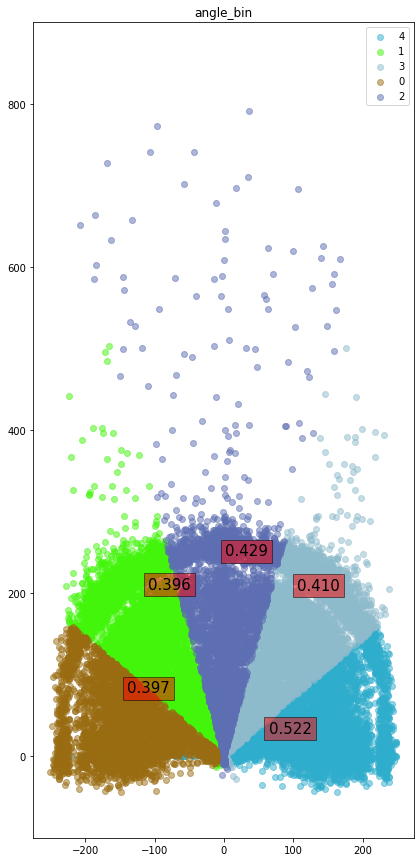

In [ ]:
plot_zone_wise('angle_bin')

The above graph shows the angles from which the shot which was taken are equally distributed.

In [ ]:
df['hurry_regular_shot'] = False
df.loc[(df['seconds'] <=2) & (df['shot_distance'] < 30), 'hurry_regular_shot'] = True

The new feature above is introduced to see if it was a shot which was made was taken in a hurry before the period is about to get over. If the seconds is less than 2 and shot_distance is also less than 30.

In [ ]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id,alleyoop,bank,cutting,driving,dunk,fadeaway,fingerroll,floating,followup,hook,jump,layup,pullup,putback,reverse,running,slam,stepback,tip,turnaround,seconds,angle,angle_bin,hurry_regular_shot
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,0,2000-01,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,627,66.677303,4,False
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,622,90.000000,4,False
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,465,-36.801931,1,False
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,412,38.258303,3,False
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,0,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,379,90.000000,4,False


In [ ]:
df['matchup_code'] = df.matchup.apply(lambda x: 0 if (x.split(' ')[1])=='@' else 1)

 

*   The above feature is introduced to convert the column into a categorical column.If the matchup value contain team 1 vs team 2 it means that the match is in home ground.
*    If the value contains team 1 @ team 2 (LAL @ POR) it means its in the opponent team's ground
*    So according to the code if the value contains @ it is 0 and 'vs' is 1

 

In [ ]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id,alleyoop,bank,cutting,driving,dunk,fadeaway,fingerroll,floating,followup,hook,jump,layup,pullup,putback,reverse,running,slam,stepback,tip,turnaround,seconds,angle,angle_bin,hurry_regular_shot,home,matchup_code
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,0,2000-01,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,627,66.677303,4,False,False,0
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,622,90.000000,4,False,False,0
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,465,-36.801931,1,False,False,0
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,412,38.258303,3,False,False,0
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,0,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,379,90.000000,4,False,False,0


In [ ]:
df.shot_type.value_counts()

2PT Field Goal    24271
3PT Field Goal     6426
Name: shot_type, dtype: int64

In [ ]:
# 3PT above 30ft
df['pt_class'] = 2
# 3PT under equal 30ft
df.loc[(df.shot_type.str.contains('3')) & (df['shot_distance'] < 30) , 'pt_class'] = 1
# 2PT
df.loc[ df.shot_type.str.contains('2'), 'pt_class' ] = 0

The above code introduces a feature called pt_class.


*   The default value is 2
*   If the shot_type is 3PT Field Goal and shot_distance is less than 30 then it is set to 1
*   If the shot type is 2PT field goal it is 0



In [ ]:
df.season.value_counts()

2005-06    2318
2008-09    2242
2002-03    2241
2007-08    2153
2009-10    2080
2001-02    2028
2006-07    1887
2000-01    1868
2010-11    1825
2003-04    1638
2011-12    1637
2012-13    1593
1999-00    1577
2004-05    1324
2015-16    1113
1997-98     989
1998-99     921
2014-15     713
1996-97     477
2013-14      73
Name: season, dtype: int64

In [ ]:
df['season'] = df.season.str.split('-').str[0]
df['season'] = df.season.astype(int)


In season feature the year before the hyphen is kept in the column and converted to integer for better processing

### **Converting the categorical columns using One Hot Encoding**

In [ ]:
categorial_cols = ['action_type','combined_shot_type' ,'shot_zone_basic', 'angle_bin', 'pt_class', 'opponent','shot_zone_range','shot_zone_area',  ]

In [ ]:
for cc in categorial_cols:
    dummies = pd.get_dummies(df[cc])
    dummies = dummies.add_prefix("{}#".format(cc))
    df.drop(cc, axis=1, inplace=True)
    df = df.join(dummies)

The categorical columns are converted using One Hot encoding for better processing.

In [ ]:
df.head()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,team_id,team_name,game_date,matchup,shot_id,seconds,angle,hurry_regular_shot,matchup_code,action_type#AlleyOop Dunk Shot,action_type#AlleyOop Layup shot,action_type#Cutting FingerRoll Layup Shot,action_type#Cutting Layup Shot,action_type#Driving Bank shot,action_type#Driving Dunk Shot,action_type#Driving FingerRoll Layup Shot,action_type#Driving FingerRoll Shot,action_type#Driving Floating Jump Shot,action_type#Driving Hook Shot,action_type#Driving Jump shot,action_type#Driving Layup Shot,action_type#Driving Reverse Layup Shot,action_type#Driving Slam Dunk Shot,action_type#Dunk Shot,action_type#Fadeaway Bank shot,action_type#Fadeaway Jump Shot,action_type#FingerRoll Layup Shot,action_type#FingerRoll Shot,action_type#Floating Jump shot,action_type#FollowUp Dunk Shot,action_type#Hook Bank Shot,action_type#Hook Shot,action_type#Jump Bank Shot,action_type#Jump Hook Shot,action_type#Jump Shot,action_type#Layup Shot,action_type#Pullup Bank shot,action_type#Pullup Jump shot,action_type#Putback Dunk Shot,action_type#Putback Layup Shot,action_type#Putback Slam Dunk Shot,action_type#Reverse Dunk Shot,action_type#Reverse Layup Shot,action_type#Reverse Slam Dunk Shot,action_type#Running Bank shot,action_type#Running Dunk Shot,action_type#Running FingerRoll Layup Shot,action_type#Running FingerRoll Shot,action_type#Running Hook Shot,action_type#Running Jump Shot,action_type#Running Layup Shot,action_type#Running PullUp Jump Shot,action_type#Running Reverse Layup Shot,action_type#Running Tip Shot,action_type#Slam Dunk Shot,action_type#StepBack Jump shot,action_type#Tip Layup Shot,action_type#Tip Shot,action_type#Turnaround Bank shot,action_type#Turnaround Fadeaway Bank Jump Shot,action_type#Turnaround Fadeaway shot,action_type#Turnaround FingerRoll Shot,action_type#Turnaround Hook Shot,action_type#Turnaround Jump Shot,combined_shot_type#Bank Shot,combined_shot_type#Dunk,combined_shot_type#Hook Shot,combined_shot_type#Jump Shot,combined_shot_type#Layup,combined_shot_type#Tip Shot,shot_zone_basic#Above the Break 3,shot_zone_basic#Backcourt,shot_zone_basic#In The Paint (Non-RA),shot_zone_basic#Left Corner 3,shot_zone_basic#Mid-Range,shot_zone_basic#Restricted Area,shot_zone_basic#Right Corner 3,angle_bin#0,angle_bin#1,angle_bin#2,angle_bin#3,angle_bin#4,pt_class#0,pt_class#1,pt_class#2,opponent#ATL,opponent#BKN,opponent#BOS,opponent#CHA,opponent#CHI,opponent#CLE,opponent#DAL,opponent#DEN,opponent#DET,opponent#GSW,opponent#HOU,opponent#IND,opponent#LAC,opponent#MEM,opponent#MIA,opponent#MIL,opponent#MIN,opponent#NJN,opponent#NOH,opponent#NOP,opponent#NYK,opponent#OKC,opponent#ORL,opponent#PHI,opponent#PHX,opponent#POR,opponent#SAC,opponent#SAS,opponent#SEA,opponent#TOR,opponent#UTA,opponent#VAN,opponent#WAS,shot_zone_range#16-24 ft.,shot_zone_range#24+ ft.,shot_zone_range#8-16 ft.,shot_zone_range#Back Court Shot,shot_zone_range#Less Than 8 ft.,shot_zone_area#Back Court(BC),shot_zone_area#Center(C),shot_zone_area#Left Side Center(LC),shot_zone_area#Left Side(L),shot_zone_area#Right Side Center(RC),shot_zone_area#Right Side(R)
0,10,20000012,33.9723,167,72,-118.1028,10,1,0,2000,27,18,NaN,2PT Field Goal,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,1,627,66.677303,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000,22,15,0.0,2PT Field Goal,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,2,622,90.000000,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,35,20000012,

### **Dropping features which do not contribute to the target variable**

In [ ]:
columns_to_drop = [ 'game_id', 'game_event_id', 'lat', 'lon',
                    'minutes_remaining', 'seconds_remaining', 
                    'angle', 'playoffs', 'team_id', 'team_name', 'game_date', 'matchup',  'shot_type', 'shot_id']

In [ ]:
df.drop(columns_to_drop, axis=1, inplace=True)
pd.set_option('display.max_columns', 500)
df.columns.values

array(['loc_x', 'loc_y', 'period', 'season', 'shot_distance',
       'shot_made_flag', 'alleyoop', 'bank', 'cutting', 'driving', 'dunk',
       'fadeaway', 'fingerroll', 'floating', 'followup', 'hook', 'jump',
       'layup', 'pullup', 'putback', 'reverse', 'running', 'slam',
       'stepback', 'tip', 'turnaround', 'seconds', 'hurry_regular_shot',
       'matchup_code', 'action_type#AlleyOop Dunk Shot',
       'action_type#AlleyOop Layup shot',
       'action_type#Cutting FingerRoll Layup Shot',
       'action_type#Cutting Layup Shot', 'action_type#Driving Bank shot',
       'action_type#Driving Dunk Shot',
       'action_type#Driving FingerRoll Layup Shot',
       'action_type#Driving FingerRoll Shot',
       'action_type#Driving Floating Jump Shot',
       'action_type#Driving Hook Shot', 'action_type#Driving Jump shot',
       'action_type#Driving Layup Shot',
       'action_type#Driving Reverse Layup Shot',
       'action_type#Driving Slam Dunk Shot', 'action_type#Dunk Shot',
     

The above code is to eliminate the features which may not be that important for the model.The reasons are as follows:


*   Team_id remains constant as it denotes Kobe Bryants team_id
*   Team_name remains constant name as it denotes Kobe Bryants team name
*   Game_id and game_event_id are both unique identifiers which do not have any relevancy withe remaining data
*   lat and long columns are same as loc_x and loc_y. They are also highly correlated to each other as shown in the above graphs indicating multicollinearity between the independent variables.
*   minutes_remaining and seconds_remaining are combined to a single column 'seconds'
*   matchup has been transformed into a categorical column 'matchup_code'
*   shot_type has been converted into pt_class column
*   shot_id is a unique id. The shot_ids for missing shot_made_flag rows is stored in shot_id_rows variable




## **Dividing the dataset into Target and Independent variables**

In [ ]:
nanRows = df.loc[df['shot_made_flag'].isnull()]
nanRows.index = range(len(nanRows)) 



fullRows = df.loc[~df['shot_made_flag'].isnull()]

X_test = nanRows.drop('shot_made_flag', axis=1)

Y = fullRows['shot_made_flag'].copy()
X = fullRows.drop('shot_made_flag', axis=1)

## **Evaluating Models**

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[-0.62048487 -0.62282346 -0.61175423 -0.62622889 -0.61616505]
Logistic regression: (-0.619) +/- (0.005)
[-0.63368538 -0.638455   -0.62604164 -0.66947151 -0.63534508]
Random Forest: (-0.641) +/- (0.015)
[-0.6887989  -0.68787017 -0.6881516  -0.68860987 -0.68810155]
Ada Boost: (-0.688) +/- (0.000)
[-0.60336407 -0.60659332 -0.5981832  -0.61295264 -0.60146386]
Gradient Boosting: (-0.605) +/- (0.005)
[-0.6012752  -0.6025748  -0.59690576 -0.6129865  -0.60051637]
LightGBM: (-0.603) +/- (0.005)


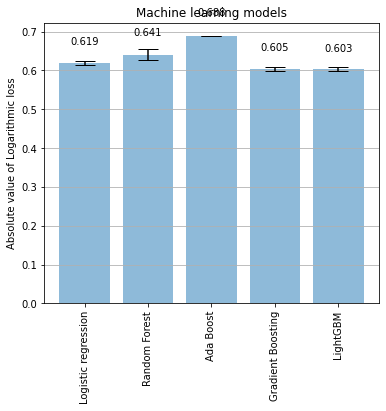

In [ ]:
seed =50
processors=1
num_folds=5
num_instances=len(X)
scoring='neg_log_loss'


num_trees = 100
num_features = 20
# Prepare some basic models

seed = 50
num_folds = 5
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle = True)

models = []
models.append(('Logistic regression', LogisticRegression()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Ada Boost', AdaBoostClassifier()))
models.append(('Gradient Boosting', GradientBoostingClassifier()))
models.append(('LightGBM', lgb.LGBMClassifier()))

# Evaluate each model in turn
results = []
names = []
stds = []
means =[]
for name, model in models:
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='neg_log_loss', n_jobs=1)
    print(cv_results)
    print("{0}: ({1:.3f}) +/- ({2:.3f})".format(name, cv_results.mean(), cv_results.std()))
    results.append(cv_results)
    names.append(name)
    stds.append(cv_results.std())
    means.append(abs(cv_results.mean()))

    
x_pos = np.arange(len(models))
# Build the plot
fig, ax = plt.subplots()
rects1 = ax.bar(x_pos, means, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Absolute value of Logarithmic loss')
ax.set_xticks(x_pos)
ax.set_xticklabels(names)
ax.set_title('Machine learning models')
ax.yaxis.grid(True)
plt.subplots_adjust(top=1.1)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.07*height,
                '%.3f' % height,
                ha='center', va='bottom')

autolabel(rects1)
# Save the figure and show
#plt.tight_layout()
plt.xticks(rotation='vertical')
plt.show()
    

 In the above code multiple models were created with the default parameters. The models which were used to selected are:

*  Logistic Regression
*  Random Forest Classifier
*  ADA Boosting
*  Gradient Boosting
*  Light GBM

The negative log loss is the scoring which is the estimator.As seen from the scores and the graph above, Light GBM is generating a better score than all the other models with the least negative log loss value.The model was evaluated using cross validation score. The data is divided into 5 k folds where k-1 fold is combined into one training set and remaining one into test.The performance metric is negative log loss

## **Hyperparameter Tuning using GRID Search**

**Hyperparameter tuning for Light GBM:**

In [ ]:
lgb_grid = GridSearchCV(
    estimator = lgb.LGBMClassifier(seed = 1),
    param_grid = {
        'n_estimators': [70, 80, 90, 150, 500, 600],
        'learning_rate' : [0.01, 0.05, 0.1],
        'n_estimators': [70, 100, 250, 500],
        'max_depth': [4, 7, 10],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'n_estimators': [100, 150, 500],
        'learning_rate' : [0.01, 0.05],
        'max_depth': [7, 10],
        'subsample': [0.6, 0.8],
        'colsample_bytree': [0.6, 0.8],
    }, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors)

lgb_grid.fit(X, Y)

print(lgb_grid.best_score_)
print(lgb_grid.best_params_)

-0.5987588890091626
{'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 500, 'subsample': 0.6}


**Hyperparameter tuning for Logistic Regression:**

In [ ]:
lr_grid = GridSearchCV(
    estimator = LogisticRegression(random_state=seed),
    param_grid = {
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 1, 10, 100, 1000]
    }, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors)

lr_grid.fit(X, Y)

print(lr_grid.best_score_)
print(lr_grid.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partit

-0.6174634274283065
{'C': 10, 'penalty': 'l2'}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Hyperparameter tuning for Random Forest:**

In [ ]:
rf_grid = GridSearchCV(
    estimator = RandomForestClassifier(warm_start=True, random_state=seed),
    param_grid = {
        'n_estimators': [100, 200],
        'criterion': ['gini', 'entropy'],
        'max_features': [18, 20],
        'max_depth': [8, 10],
        'bootstrap': [True]
    }, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors)

rf_grid.fit(X, Y)

print(rf_grid.best_score_)
print(rf_grid.best_params_)

-0.6031147012366482
{'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 20, 'n_estimators': 200}


**Hyperparameter tuning for ADA Boosting:**

In [ ]:
ada_grid = GridSearchCV(
    estimator = AdaBoostClassifier(random_state=seed),
    param_grid = {
        'algorithm': ['SAMME', 'SAMME.R'],
        'n_estimators': [10, 25, 50],
        'learning_rate': [1e-3, 1e-2, 1e-1]
    }, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors)

ada_grid.fit(X, Y)

print(ada_grid.best_score_)
print(ada_grid.best_params_)

-0.6372341850074335
{'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 50}


**Hyperparameter tuning for Gradient Boosting:**

In [ ]:
gbm_grid = GridSearchCV(
    estimator = GradientBoostingClassifier(warm_start=True, random_state=seed),
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [2, 3, 4],
        'max_features': [10, 15, 20],
        'learning_rate': [1e-1, 1]
    }, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors)

gbm_grid.fit(X, Y)

print(gbm_grid.best_score_)
print(gbm_grid.best_params_)

-0.6024556263810128
{'learning_rate': 0.1, 'max_depth': 4, 'max_features': 20, 'n_estimators': 200}


After optimizing all the algorithms with hyperparameter tuning, it is observed that Light GBM has the lowest Log_loss score.

## **Test Set - Final Model**

In [ ]:
model = lgb.LGBMClassifier(seed=1, learning_rate=0.01, n_estimators=500, max_depth=7, subsample=0.6, colsample_bytree=0.6)
model.fit(X, Y)

nanRows['shot_made_flag'] = model.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


## **Interpretation of the model using SHAP**

In [ ]:
pip install shap

     |████████████████████████████████| 371 kB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509234 sha256=26152ab3dcba4046fd1a6ca7346b6dc24ff34da43264230f00c0819694388ee0
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


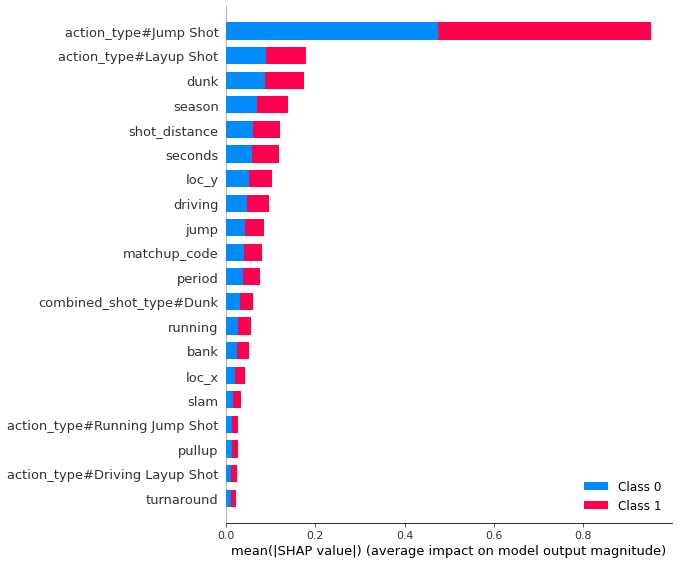

In [ ]:
import shap
shap_values = shap.TreeExplainer(model).shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")



*   From the above graph of SHAP values we can infer that the action_type#Jump shot has the highest important for the model. SHAP values represent how much contribution did each feature make to the model.
*   Here there are some other features which show less importannce towards the model. The colors indicate how much contribution did each feature have towards the shots missed and shots made.




In [ ]:
submission = pd.DataFrame()
submission['shot_id'] = shot_id_rows['shot_id']
submission['shot_made_flag'] = nanRows['shot_made_flag']
submission
submission.to_csv('submission.csv', index=False)

In [ ]:
from google.colab import files
files.download("submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Conclusion**

The dataset was improved by data cleaning of certain columns and introducing new features into th dataset like angle_bin, seconds, matchup_code, hurry_regular_shot.

After running all the models, we can conclude that Light GBM gave the best log_loss score. After hyperparameter tuning all the model using GRID search the performance has improved.We got the best parameters and the model was optimized to a great extent.

Log-loss score before hyperparameter tuning = -0.603

Log-loss score after hyperparameter tuning = -0.5987588890091626

### **Contributions**
Implemented Light GBM model for better performance 

Grid Search for all the models


### **References**
Kaggle - https://www.kaggle.com/vasa137/black-mamba

Kaggle - https://www.kaggle.com/aakashkerawat/exploring-and-predicting-lb-score-0-60160

https://github.com/Physicist91/kobe/blob/master/code/show-me-your-best-model.ipynb

Python Machine Learning Cookbook

Towards Data science


Copyright 2021 Ankana Samanta

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE


